In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
df_train = pd.read_csv('/content/drive/MyDrive/MI/data/train.csv')
df_train.head()

,text,label
0,bwhen im telling people much checking account ...,1
1,banwar alawlaki june september anwars life hig...,0
2,ball black people suspected trying pull something,0
3,bevery asian feels need camera take photos eve...,0
4,bpeople blind low vision treated respect digni...,1


In [27]:
df_test = pd.read_csv('/content/drive/MyDrive/MI/data/train.csv')
df_test.head()

,text,label
0,bwhen im telling people much checking account ...,1
1,banwar alawlaki june september anwars life hig...,0
2,ball black people suspected trying pull something,0
3,bevery asian feels need camera take photos eve...,0
4,bpeople blind low vision treated respect digni...,1


In [28]:
df_train['text'] = df_train['text'].astype('string')
df_train = df_train.dropna()

In [29]:
df_test['text'] = df_test['text'].astype('string')
df_test = df_test.dropna()

In [30]:
x_train = df_train['text']
y_train = df_train['label']
x_test = df_test['text']
y_test = df_test['label']

In [31]:
xgb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', XGBClassifier(random_state = 42, seed = 2, colsample_bytree = 0.9, subsample = 0.9)),])
xgb.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(colsample_bytree=0.9, random_state=42, seed=2,
                               subsample=0.9))])

In [32]:
y_pred = xgb.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 74.09%


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.59      0.69      3611
           1       0.68      0.90      0.77      3555

    accuracy                           0.74      7166
   macro avg       0.77      0.74      0.73      7166
weighted avg       0.77      0.74      0.73      7166



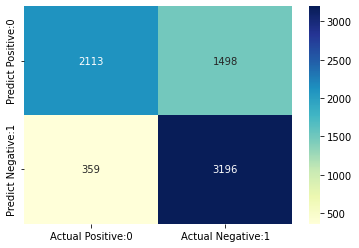

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:0', 'Actual Negative:1'], index = ['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')